# Importer les biblio 

In [46]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Read the data 


In [21]:
data = pd.read_csv("Bitcoin_tweets.csv")

C:\Users\PC GAMER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
data.tail(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
4012396,afsheenjafry,Dunstable,"""You were wild once. Don't let them tame you.....",2013-01-16 11:03:34,5077.0,2581.0,4941.0,False,2022-07-11 15:24:39,Full if👉🏻 https://t.co/OafLKc66cX #bitcoin #bt...,"['bitcoin', 'btc']",Twitter for iPhone,False
4012397,Maral Nouri - Paris,"Dubai, United Arab Emirates",Let's talk crypto: https://t.co/9Uor9mbrnP & h...,2020-04-13 18:39:01,5501.0,219.0,1298.0,False,2022-07-11 15:24:34,You can’t believe how honored and proud I am t...,"['Media', 'Crypto', 'web3', 'btc']",Twitter for iPhone,False
4012398,Ⓜ️ariusz,NaN,Crypto and networking enthusiast\nSupplychain ...,2020-09-03 20:30:24,463.0,384.0,18962.0,False,2022-07-11 15:24:31,$MNW has one of the highest upside in any comp...,"['masternode', 'passiveincome', 'worldtrade', ...",Twitter for Android,False
4012399,Girl Gone Crypto #NAAcrew,Istanbul,#NAAcrew team is analyzing the pair you want. ...,2012-04-28 15:10:49,45451.0,38154.0,28.0,False,2022-07-11 15:24:24,"Why #bitcoin, #ethereum, and #Dogecoin Are Fal...","['bitcoin', 'ethereum', 'Dogecoin', 'cryptocur...",Twitter Web App,False
4012400,Rena (33.3%),NaN,Co-founder of @theartisan_nft ⌚️ #DeGods owner...,2017-06-11 01:35:28,337.0,859.0,857.0,False,2022-07-11 15:24:23,@CryptoAnglio O yes buy #BTC man!,['BTC'],Twitter Web App,False


In [32]:
df = pd.read_csv("tweet_presedency.csv")

In [33]:
df.head()

,Created on,IS Retweet,IS Reply,Tweet ID,Tweet Body,Language,Likes,Retweet Count,Source,Medias,User Mentioned,URLS,Hashtags,Symbols
0,Mon Dec 20 21:28:23 +0000 2021,False,False,1473042623367626755,President #Kais_Saied receives National Defens...,en,24,4.0,Twitter Web App,NaN,NaN,NaN,Kais_Saied; TnPR;,NaN
1,Mon Dec 20 21:20:44 +0000 2021,False,False,1473040696395325446,#_ . #TnPR https://t.co...,ar,91,10.0,Twitter Web App,https://twitter.com/TnPresidency/status/14730...,NaN,NaN,_; TnPR;,NaN
2,Mon Dec 20 21:13:54 +0000 2021,False,False,1473038977804509185,In a meeting with the Justice &amp; Interior M...,en,28,2.0,Twitter Web App,NaN,NaN,NaN,Kais_Saied; TnPR;,NaN
3,Mon Dec 20 21:01:27 +0000 2021,False,False,1473035843401097225,#_ . #TnPR ht...,ar,120,16.0,Twitter Web App,https://twitter.com/TnPresidency/status/14730...,NaN,NaN,_; TnPR;,NaN
4,Sat Dec 18 22:59:57 +0000 2021,False,False,1472340889813106694,In a call with the Minister of Youth &amp; Spo...,en,28,3.0,Twitter Web App,NaN,NaN,NaN,Kais_Saied; FIFArabCup; TnPR;,NaN


In [34]:
def Plot_Analysis():

# Create a function to clean the tweets
                    def cleanTxt(text):
                        text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
                        text = re.sub('#', '', text) # Removing '#' hash tag
                        text = re.sub('RT[\s]+', '', text) # Removing RT
                        text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

                        return text


# Clean the tweets
                    df['Tweet Body'] = df['Tweet Body'].apply(cleanTxt)


                    def getSubjectivity(text):
                        return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
                    def getPolarity(text):
                        return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
                    df['Subjectivity'] = df['Tweet Body'].apply(getSubjectivity)
                    df['Polarity'] = df['Tweet Body'].apply(getPolarity)


                    def getAnalysis(score):
                        if score < 0:
                            return 'Negative'
                        elif score == 0:
                            return 'Neutral'
                        else:
                            return 'Positive'
    
                    df['Analysis'] = df['Polarity'].apply(getAnalysis)


                    return df

df= Plot_Analysis()

<AxesSubplot:xlabel='Analysis', ylabel='count'>

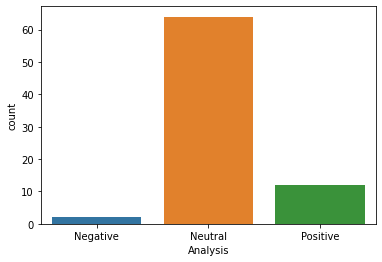

In [42]:
sns.countplot(x=df["Analysis"],data=df)

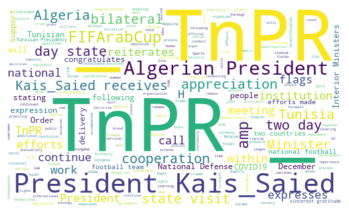

In [44]:
 def gen_wordcloud():
                    stopwords = set(STOPWORDS)
                    stopwords.update(['de', 'à', 'une', 'un','of','https','t','the','they','this' ,'le', 'la', 'vous', 'nous','pour','quoi','plus','au','fait','son','cet','cette','cettes',
                                      'pas', 'sur', 'ton', 'ta', 'te', 'ce', 'ces','d','s','et','il','aux','même','qu',"entre",'été',"sa",'rien','deux',
                                      'après','Pour','Tous','tous','pur','Tout','tout','d''une','d''un',
                                      'se', 'ses', 'par','en','qui','que','dans','soit','sait','ont','ou','les','l','leurs','leur','est','d''où','pourquoi','où',
                                      'des','du','ne','n','tunis','tunisie','Tunisie','avec','TunisieTunisie','non','d''une','qu''elle','elles','t','elle','avait','sous'])

# word cloud visualization
                    allWords = ' '.join([twts for twts in df['Tweet Body']])
                    wordCloud = WordCloud(background_color = 'white',
                                          stopwords = stopwords,
                                          width=500, height=300,
                                          random_state=21,
                                          max_font_size=110).generate(allWords)
                    plt.imshow(wordCloud, interpolation="bilinear")
                    plt.axis('off')
                    plt.savefig('WC.jpg')
                    img= Image.open("WC.jpg") 
                    return img

img=gen_wordcloud()


